In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
import numpy as np
import pandas as pd
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data1 = np.load("/home/agajan/DeepMRI/DiffusionMRI/Model1_tanh_h_search_neighboring.npz")
data2 = np.load("/home/agajan/DeepMRI/DiffusionMRI/Model1_tanh_h_search.npz")

data3 = np.load("/home/agajan/DeepMRI/DiffusionMRI/scripts/Model1_tanh_h_search_neighboring_1_9.npz")
data4 = np.load("/home/agajan/DeepMRI/DiffusionMRI/scripts/Model1_tanh_h_search_1_9.npz")
n = len(data1["scores"])
data = []
for i in range(n):
    data += [[data1["epochs"][i], data1["scores"][i], "Neighboring slices"]]
    data += [[data2["epochs"][i], data2["scores"][i], "Full brain"]]

for i in range(9):
    data += [[data3["epochs"][i], data3["scores"][i], "Neighboring slices"]]
    data += [[data4["epochs"][i], data4["scores"][i], "Full brain"]]
    
df = pd.DataFrame(data, columns=["h-dimension", "DICE score", "Test set"])
df.head()

,h-dimension,DICE score,Test set
0,10,0.643402,Neighboring slices
1,10,0.438084,Full brain
2,11,0.625202,Neighboring slices
3,11,0.436543,Full brain
4,12,0.630060,Neighboring slices


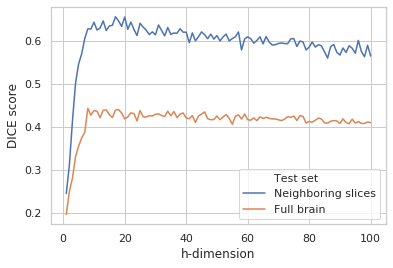

In [3]:
sns.set(style="whitegrid")
sns.lineplot(x="h-dimension", y="DICE score", data=df, hue="Test set")

In [4]:
scores1 = list(data3["scores"]) + list(data1["scores"])
hs1 = list(data3["epochs"]) + list(data1["epochs"])
hs1[np.argmax(scores1)]

17

In [5]:
scores2 = list(data4["scores"]) + list(data2["scores"])
hs2 = list(data4["epochs"]) + list(data2["epochs"])
hs2[np.argmax(scores2)]

8

In [6]:
hs2[7], scores2[7], scores2[17]

(8, 0.44328603466072397, 0.440268289542067)

In [7]:
hs1[7], scores1[7], scores1[17]

(8, 0.628131403052688, 0.6463656716182061)

In [8]:
h8_losses = [0.00871, 0.00284, 0.00260, 0.00253, 0.00252, 0.00252, 0.00252, 0.00252, 0.00252, 0.00251]
h10_losses = [0.00666, 0.00239, 0.00226, 0.00224, 0.00223, 0.00223, 0.00223, 0.00223, 0.00223, 0.00223]
h17_losses = [0.00494, 0.00215, 0.00201, 0.00197, 0.00196, 0.00196, 0.00196, 0.00196, 0.00195, 0.00195]
h22_losses = [0.00433, 0.00201, 0.00189, 0.00185, 0.00184, 0.00183, 0.00183, 0.00183, 0.00183, 0.00183]
h100_losses = [0.00218, 0.00128, 0.00123, 0.00121, 0.00119, 0.00118, 0.00118, 0.00117, 0.00117, 0.00117]
loss_data = []
for i in range(10):
    loss_data += [[i+1, h8_losses[i], "h=8"]]
    loss_data += [[i+1, h10_losses[i], "h=10"]]
    loss_data += [[i+1, h17_losses[i], "h=17"]]
    loss_data += [[i+1, h22_losses[i], "h=22"]]
    loss_data += [[i+1, h100_losses[i], "h=100"]]

loss_df = pd.DataFrame(loss_data, columns=["Epochs", "MSE Loss", "Dimension"])
loss_df.head()

,Epochs,MSE Loss,Dimension
0,1,0.00871,h=8
1,1,0.00666,h=10
2,1,0.00494,h=17
3,1,0.00433,h=22
4,1,0.00218,h=100


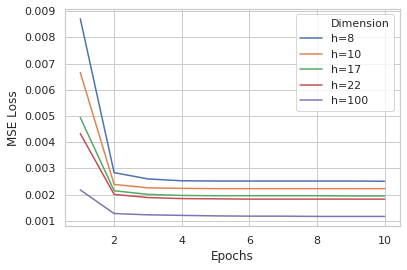

In [9]:
sns.set(style="whitegrid")
sns.lineplot(x="Epochs", y="MSE Loss", hue="Dimension", data=loss_df)

In [10]:
scores1[7], scores1[9], scores1[16], scores1[21], scores1[99]

(0.628131403052688,
 0.6434024379357102,
 0.656152862790065,
 0.643666242199663,
 0.564921143006879)

In [11]:
scores2[7], scores2[9], scores2[16], scores2[21], scores2[99]

(0.44328603466072397,
 0.43808447740430256,
 0.4393200901045221,
 0.432755804090308,
 0.4100257065854711)